In [21]:
import os
from scipy.io import wavfile
import numpy as np
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as transforms
from IPython.display import Audio
# import ffmpeg
from IPython import display

print(torch.__version__)
print(torchaudio.__version__)

import matplotlib.pyplot as plt

2.1.0+cu121
2.1.0+cu121


In [22]:
def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
        if xlim:
            axes[c].set_xlim(xlim)
    figure.suptitle(title)

In [23]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
    # STFT 파라미터 설정
    window_size = 4096
    hop_size = 128
    n_mels = 128

    # STFT 변환기 생성
    stft_transform = transforms.Spectrogram(n_fft=window_size, hop_length=hop_size, window_fn=torch.hamming_window)

    # STFT 계산
    stft = stft_transform(waveform)

    # Mel 스펙트로그램 변환기 생성
    mel_spec_transform = transforms.MelSpectrogram(sample_rate=sample_rate, n_fft=window_size, hop_length=hop_size, n_mels=n_mels)

    # Mel 스펙트로그램 계산
    mel_spec = mel_spec_transform(waveform)

    # 결과 시각화: Mel 스케일(인간의 청각 시스템에 더 가까운 형태)로 변환한 STFT magnitude
    plt.imshow(torch.log(mel_spec + 1e-9).squeeze().numpy(), aspect='auto', origin='lower')
    plt.xlabel('Time')
    plt.ylabel('Mel Filter')
    plt.title('Mel Spectrogram')
    plt.colorbar(format='%+2.0f dB')

In [49]:
folder="Convolution"
subfolder1="compare"
subfolder2="mic_signal"
subfolder3="src2"

file1_path=os.path.join(folder,subfolder1)
file2_path=os.path.join(folder,subfolder2)
file3_path=os.path.join(folder,subfolder3)

file1_list=os.listdir(file1_path)
file2_list=os.listdir(file2_path)
file3_list=os.listdir(file3_path)
file1_list.sort()
file2_list.sort()
file3_list.sort()
print(file1_list)
print(file2_list)
print(file3_list)

['Convolution_3ch_src1_rcv1.wav', 'Convolution_3ch_src1_rcv2.wav', 'Convolution_3ch_src1_rcv3.wav', 'Convolution_3ch_src2_rcv1.wav', 'Convolution_3ch_src2_rcv2.wav', 'Convolution_3ch_src2_rcv3.wav', 'mic1.wav', 'mic2.wav', 'mic3.wav']
['mic1.wav', 'mic2.wav', 'mic3.wav']
['Convolution_3ch_src2_rcv1.wav', 'Convolution_3ch_src2_rcv2.wav', 'Convolution_3ch_src2_rcv3.wav']


In [52]:
wav1 = os.path.join(file1_path, file1_list[6])
wav2 = os.path.join(file2_path, file2_list[0])
wav3 = os.path.join(file3_path, file3_list[1])

In [53]:
print(wav1)
print(wav2)
print(wav3)

Convolution/compare/mic1.wav
Convolution/mic_signal/mic1.wav
Convolution/src2/Convolution_3ch_src2_rcv2.wav


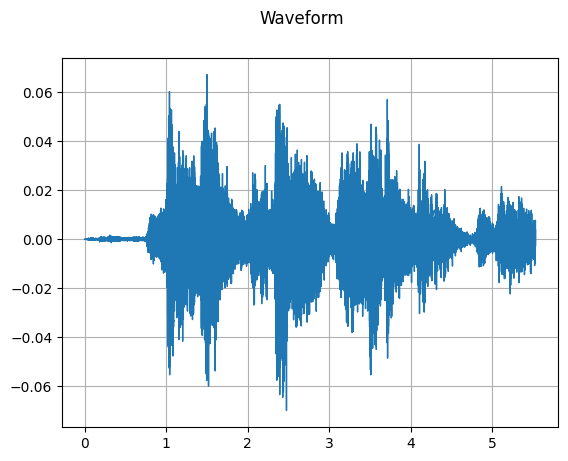

In [54]:
sample1, sample_rate = torchaudio.load(wav1)
plot_waveform(sample1, sample_rate)
Audio(sample1, rate=sample_rate)

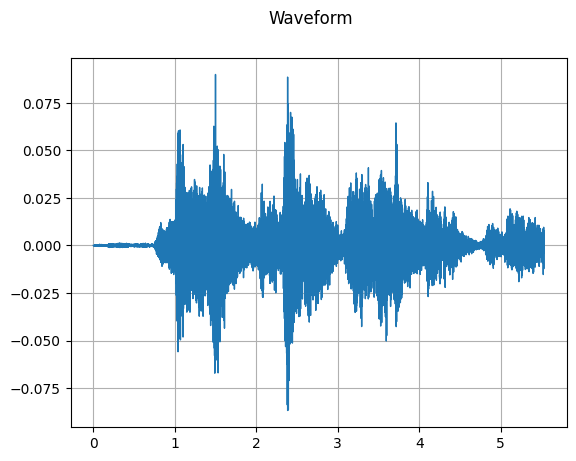

In [55]:
sample2, sample_rate = torchaudio.load(wav2)
plot_waveform(sample2, sample_rate)
Audio(sample2, rate=sample_rate)

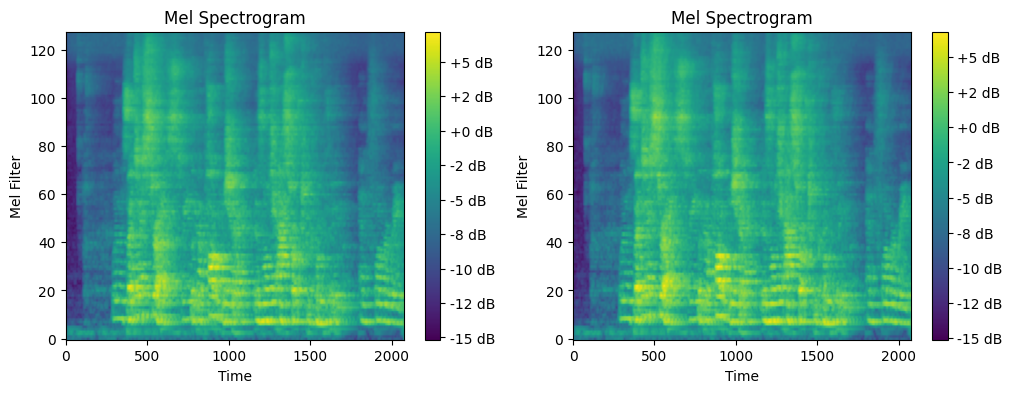

In [56]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_specgram(sample1, sample_rate)


plt.subplot(1, 2, 2)
plot_specgram(sample2, sample_rate)